In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
train_data = pd.read_csv('../input/train.csv')
test_data = pd.read_csv('../input/test.csv')
index = pd.read_csv('../input/index.csv')

In [3]:
print("Training data size",train_data.shape)
print("Test data size",test_data.shape)

Training data size (1225029, 3)
Test data size (117703, 2)


In [4]:
print("Unique landmark_id: ",len(train_data.groupby("landmark_id")["landmark_id"]))

Unique landmark_id:  14952


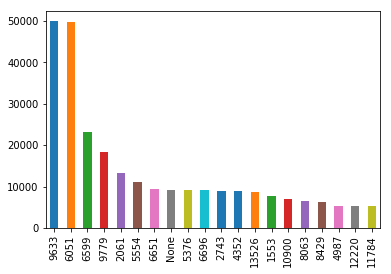

In [5]:
train_data['landmark_id'].value_counts().head(20).plot.bar()

In [6]:
# missing data in train data 
print("Missing landmark_id: ",train_data['landmark_id'].value_counts()["None"])
print("Missing url: ",train_data['url'].value_counts()["None"])

Missing landmark_id:  9260
Missing url:  9260


In [7]:
# missing data in test data 
print("Missing url: ",test_data['url'].value_counts()["None"])

Missing url:  2989


In [8]:
# landmark_id with low count
values_count = pd.DataFrame(train_data['landmark_id'].value_counts())
values_count.columns = ["count"]
low_values_count = values_count[values_count["count"] < 1000]
low_values_count

,count
11073,997
12937,988
14703,986
12752,985
6973,977
10313,976
4949,975
253,974
9738,971
2665,967


In [9]:
len(low_values_count)

14835

In [10]:
high_values_count = values_count[values_count["count"] >= 1000]
high_values_count

,count
9633,50010
6051,49806
6599,23218
9779,18309
2061,13183
5554,11033
6651,9444
None,9260
5376,9161
6696,9161


In [11]:
len(high_values_count)

117